<a href="https://colab.research.google.com/github/anindo78/Statistical-Programming-with-Colab-Notebooks/blob/main/CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulate and plot CLT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#draw from uniform distribution

low = 0
high = 1
n_draws = 1000
sample_size=100
np.random.seed(123)


sample_means = []

for i in range(n_draws):

    #create a random sample draw of size 100
    samples = np.random.uniform(low, high, size=sample_size)

    #calculate means
    sample_mean = np.mean(samples)
    sample_means.append(sample_mean)

#convert to numpy array
sample_means = np.array(sample_means)


# Calculate statistics
theoretical_mean = (low + high) / 2  # Mean of uniform distribution
theoretical_std = np.sqrt((high - low)**2 / 12)  # Std of uniform distribution
sampling_std = theoretical_std / np.sqrt(sample_size)  # Standard error

print(f"Statistics of Sample Means:")
print(f"Number of sample means: {len(sample_means)}")
print(f"Mean of sample means: {np.mean(sample_means):.4f}")
print(f"Std of sample means: {np.std(sample_means):.4f}")
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Theoretical sampling std: {sampling_std:.4f}")

Statistics of Sample Means:
Number of sample means: 1000
Mean of sample means: 0.5003
Std of sample means: 0.0292
Theoretical mean: 0.5000
Theoretical sampling std: 0.0289


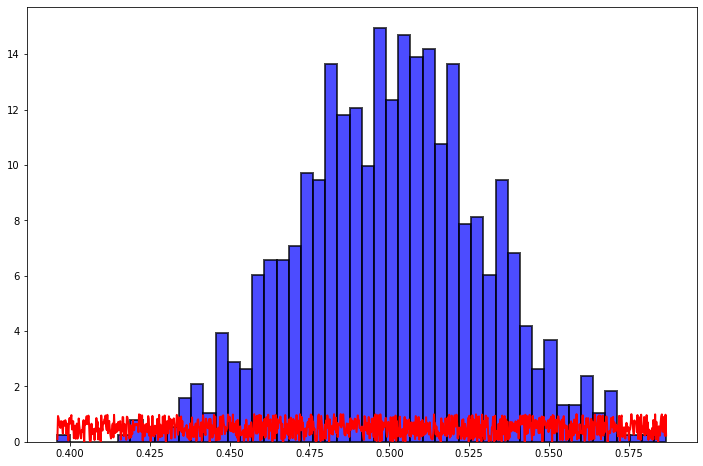

In [ ]:
# Create the histogram
plt.figure(figsize=(12, 8))

# Plot histogram
plt.hist(sample_means, bins=50, density=True,
                                alpha=0.7, color='blue',
                                edgecolor='black', linewidth=2)

# #plot theoretical distribution
x = np.linspace(sample_means.min(), sample_means.max(), 1000)
theoretical_uniform = np.random.uniform(low, high, size=len(x))
plt.plot(x, theoretical_uniform, 'r-', linewidth=2)

plt.show()

# **Case 1: Estimating Revenue Stability for Ad Campaigns**


**Scenario:**

You're analyzing the stability of daily ad revenue for a client running campaigns across different regions. You have access to 60 days of daily revenue data for each of 3 regions. The client wants to understand whether they can rely on the average daily revenue being close to a known target value (say, $10,000) and what the uncertainty around this average looks like.

**Your Task:**

Simulate synthetic revenue data for each region using a non-normal distribution (e.g., exponential or log-normal) to reflect real-world skewness.

Use bootstrapping and the Central Limit Theorem to estimate:

The sampling distribution of the sample mean revenue per region.

The 95% confidence interval for the mean revenue per region.

Plot the sampling distribution of the mean for each region, overlaying it with a normal curve predicted by the CLT.



In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_days = 60
regions = ['North America', 'Europe', 'Asia']

data = pd.DataFrame({
    'region': np.repeat(regions, n_days),
    'daily_revenue': np.concatenate([
        np.random.lognormal(mean=9, sigma=0.5, size=n_days),  # North America
        np.random.exponential(scale=10000, size=n_days),       # Europe
        np.random.gamma(shape=2, scale=5000, size=n_days)      # Asia
    ])
})
data.head()

,region,daily_revenue
0,North America,10387.485845
1,North America,7561.825055
2,North America,11201.962544
3,North America,17352.900170
4,North America,7207.830710


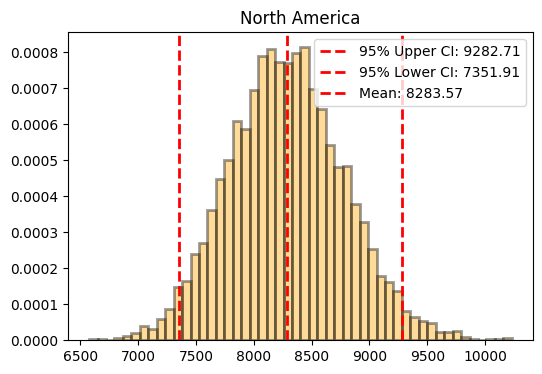

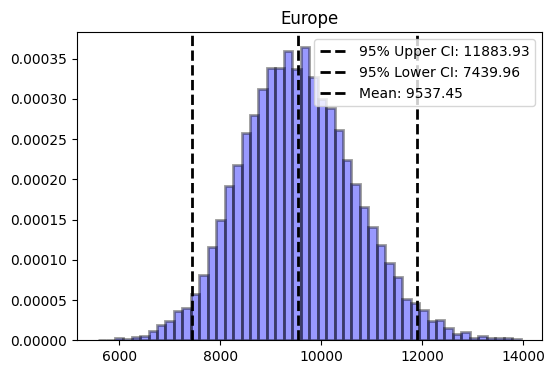

In [ ]:
# Use bootstrapping and the Central Limit Theorem to estimate:

# a) The sampling distribution of the sample mean revenue per region.

# b) The 95% confidence interval for the mean revenue per region.

# c) Plot the sampling distribution of the mean for each region, overlaying it with a normal curve predicted by the CLT.

import matplotlib.pyplot as plt
import numpy as np


regions = ['North America', 'Europe', 'Asia']

# revenue for each region

na = data[data['region'] == 'North America']['daily_revenue']
eu = data[data['region'] == 'Europe']['daily_revenue']
as_ = data[data['region'] == 'Asia']['daily_revenue']


sims = 10000


def bootstrap(series, sims):
  means = []
  for i in range(sims + 1):
    sample = series.sample(frac = 1, replace=True)
    means.append(np.mean(sample))

  return means

def ci(series, alpha):

  upper = np.percentile(series, 100 * (1 - alpha / 2))
  lower = np.percentile(series, 100 * alpha / 2)

  return upper, lower

am_means = bootstrap(na, sims)
eu_means = bootstrap(eu, sims)
as_means = bootstrap(as_, sims)

am_upper, am_lower = ci(am_means, 0.05)
eu_upper, eu_lower = ci(eu_means, 0.05)
as_upper, as_lower = ci(as_means, 0.05)

# plot
plt.figure(figsize=(6, 4))
plt.hist(am_means, bins=50, density=True, alpha=0.4, color='orange', edgecolor='black', linewidth=2)
plt.axvline(am_upper, color='red', linestyle='dashed', linewidth=2, label = f'95% Upper CI: {am_upper:.2f}')
plt.axvline(am_lower, color='red', linestyle='dashed', linewidth=2, label = f'95% Lower CI: {am_lower:.2f}')
plt.axvline(np.mean(am_means), color='red', linestyle='dashed', linewidth=2, label = f'Mean: {np.mean(am_means):.2f}')
plt.title('North America')
plt.legend()
plt.show()


plt.figure(figsize=(6, 4))
plt.hist(eu_means, bins=50, density=True, alpha=0.4, color='blue', edgecolor='black', linewidth=2)
plt.axvline(eu_upper, color='black', linestyle='dashed', linewidth=2, label = f'95% Upper CI: {eu_upper:.2f}')
plt.axvline(eu_lower, color='black', linestyle='dashed', linewidth=2, label = f'95% Lower CI: {eu_lower:.2f}')
plt.axvline(np.mean(eu_means), color='black', linestyle='dashed', linewidth=2, label = f'Mean: {np.mean(eu_means):.2f}')
plt.title('Europe')
plt.legend()
plt.show()